<a href="https://colab.research.google.com/github/Lshuman24/Data-Science-112-Final-Project/blob/main/Data_Science_Final_Project_(Predicting_Intraday_Market_Volatility).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FILE 1:

Obtaining data ~18 years of asset data on the Nasdaq (QQQ) from MarketStack API (Datset #1)**bold text**

In [ ]:
#using MarketStack API for stock quotes 

MARKETSTACK_API_KEY="43b697fd6c749297e591be3a8b7cdad7"
MARKETSTACK_TLS_SUPPORT="1"

import requests

#dates from 6/6/2005 - 3/10/2023
#most amount of data able to be obtained is 4472 using a premium key (roughly 18 years of data)
params = {
  'access_key': '43b697fd6c749297e591be3a8b7cdad7',
  'data_from': '2005-06-06T00:00:00+0000',
  'data_to': '2023-03-10T00:00:00+0000',
  'limit' : '4472'

}

api_result = requests.get('https://api.marketstack.com/v1/tickers/qqq/eod', params)

api_response = api_result.json()

print(api_response['data']['eod'])
   

[{'open': 306.72, 'high': 309.15, 'low': 303.37, 'close': 305.36, 'volume': 86558400.0, 'adj_high': 309.15, 'adj_low': 303.37, 'adj_close': 305.36, 'adj_open': 306.72, 'adj_volume': 89923732.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'QQQ', 'exchange': 'XNAS', 'date': '2023-03-17T00:00:00+0000'}, {'open': 298.0, 'high': 307.17, 'low': 297.215, 'close': 306.81, 'volume': 90133068.0, 'adj_high': 307.18, 'adj_low': 297.19, 'adj_close': 306.81, 'adj_open': 298.0, 'adj_volume': 98556824.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'QQQ', 'exchange': 'XNAS', 'date': '2023-03-16T00:00:00+0000'}, {'open': 294.71, 'high': 299.27, 'low': 293.24, 'close': 298.93, 'volume': 83326600.0, 'adj_high': 299.27, 'adj_low': 293.24, 'adj_close': 298.93, 'adj_open': 294.71, 'adj_volume': 83631535.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'QQQ', 'exchange': 'XNAS', 'date': '2023-03-15T00:00:00+0000'}, {'open': 294.31, 'high': 297.93, 'low': 293.46, 'close': 297.37, 'volume': 72715193.0

In [ ]:
#parse through api response and create unqiue columns within a DataFrame for each attribute (high, low, open, close)

import pandas as pd
#create empty lists for asset attributes
high = []
date = []
open = []
close = []
low = []
#fill attribute lists
for stock_data in api_response['data']['eod']:
  high.append(stock_data["high"])
  #trim date format to DD:MM:YYYY
  date.append(stock_data["date"][0:10])
  open.append(stock_data["open"])
  close.append(stock_data["close"])
  low.append(stock_data["low"])

#turn lists into Series
high_series = pd.Series(high)
date_series = pd.Series(date)
open_series = pd.Series(open)
close_series = pd.Series(close)
low_series = pd.Series(low)
#create a finalized dataframe
df_qqq = pd.DataFrame()
df_qqq['high'] =  high_series
df_qqq["date"] = date_series
df_qqq["open"] = open_series
df_qqq["close"] = close_series
df_qqq["low"] = low_series

from google.colab import files
df_qqq.to_csv("df_qqq", index = False)
files.download("df_qqq")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#obtained economic datset from Kaggle via csv download
df_econ = pd.read_csv("/content/index 2.csv")
df_econ


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


FILE 2: CLEANING DATA

We define the combined volaility of a day by the following formula which takes into account both the "market move" (absolute value of high - close) and the "market Trough/Peak value" (absolute value of daily high price -daily low price).

The formula is abs(close - open) + abs(high - low)

In [ ]:
df_qqq["Daily Move"] = abs(close_series - open_series)
df_qqq["Combined Vol"] = abs(close_series - open_series) + abs(high_series - low_series)
df_qqq


,high,date,open,close,low,Daily Move,Combined Vol
0,309.150,2023-03-17,306.72,305.36,303.370,1.36,7.140
1,307.170,2023-03-16,298.00,306.81,297.215,8.81,18.765
2,299.270,2023-03-15,294.71,298.93,293.240,4.22,10.250
3,297.930,2023-03-14,294.31,297.37,293.460,3.06,7.530
4,294.469,2023-03-13,286.73,290.69,285.190,3.96,13.239
...,...,...,...,...,...,...,...
4467,38.210,2005-06-17,38.11,37.87,37.750,0.24,0.700
4468,38.000,2005-06-16,37.74,37.90,37.660,0.16,0.500
4469,37.870,2005-06-15,37.83,37.70,37.250,0.13,0.750
4470,37.840,2005-06-14,37.69,37.58,37.500,0.11,0.450


In [ ]:
#filter for data from 2005 to 2017

The average monthly-intraday move is calulated by taking all "Daily Moves" and dividing by the total number of trading days. 



In [ ]:
#only want to look at dates from 01-20056 to 02-2017 to match econ dataset
print(df_qqq.index[df_qqq['date'] == "2006-01-03"].tolist())
print(df_qqq.index[df_qqq['date'] == "2017-02-01"].tolist())
#slice through df to only get the range of dates above
df_qqq = df_qqq.iloc[1537:4326, :]
df_qqq

[4330]
[1541]


,high,date,open,close,low,Daily Move,Combined Vol
1537,126.55,2017-02-07,126.06,126.29,125.97,0.23,0.81
1538,125.85,2017-02-06,125.42,125.83,125.35,0.41,0.91
1539,125.81,2017-02-03,125.49,125.68,125.33,0.19,0.67
1540,125.70,2017-02-02,125.21,125.32,124.86,0.11,0.95
1541,125.68,2017-02-01,125.42,125.43,124.86,0.01,0.83
...,...,...,...,...,...,...,...
4321,42.79,2006-01-17,42.66,42.70,42.50,0.04,0.33
4322,43.05,2006-01-13,42.94,42.98,42.73,0.04,0.36
4323,43.29,2006-01-12,43.16,43.00,42.85,0.16,0.60
4324,43.31,2006-01-11,43.02,43.21,42.87,0.19,0.63


In [ ]:
#reset indexes in new dataframe
#create a new column called year-month which will help with grouping to obtain Daily Move averages for each month
df_qqq = df_qqq.reset_index(drop=True)
dates = []
for i in range(0, 2789):
  dates.append(str(df_qqq["date"][i])[0:4] + str(df_qqq["date"][i])[4:5] + str(df_qqq["date"][i])[5:7])

df_qqq["year-month"] = dates
df_qqq



,high,date,open,close,low,Daily Move,Combined Vol,year-month
0,126.55,2017-02-07,126.06,126.29,125.97,0.23,0.81,2017-02
1,125.85,2017-02-06,125.42,125.83,125.35,0.41,0.91,2017-02
2,125.81,2017-02-03,125.49,125.68,125.33,0.19,0.67,2017-02
3,125.70,2017-02-02,125.21,125.32,124.86,0.11,0.95,2017-02
4,125.68,2017-02-01,125.42,125.43,124.86,0.01,0.83,2017-02
...,...,...,...,...,...,...,...,...
2784,42.79,2006-01-17,42.66,42.70,42.50,0.04,0.33,2006-01
2785,43.05,2006-01-13,42.94,42.98,42.73,0.04,0.36,2006-01
2786,43.29,2006-01-12,43.16,43.00,42.85,0.16,0.60,2006-01
2787,43.31,2006-01-11,43.02,43.21,42.87,0.19,0.63,2006-01


In [ ]:
#group by year-month to get average daily market move of each month. 
daily_move_series = df_qqq.groupby("year-month")["Daily Move"].mean()
daily_move_series_df = pd.DataFrame(daily_move_series)
daily_move_series_df

,Daily Move
year-month,
2006-01,0.217333
2006-02,0.297895
2006-03,0.237826
2006-04,0.267368
2006-05,0.282727
...,...
2016-10,0.377143
2016-11,0.838571
2016-12,0.536190


In [ ]:
#group by year-month to obtain the comvined volaility value for each month/year
combined_vol_series = df_qqq.groupby("year-month")["Combined Vol"].mean() 
combined_vol_series_df = pd.DataFrame(combined_vol_series)
combined_vol_series_df

,Combined Vol
year-month,
2006-01,0.706667
2006-02,0.839474
2006-03,0.773935
2006-04,0.822084
2006-05,0.849550
...,...
2016-10,1.285581
2016-11,2.243662
2016-12,1.635476


This will serve as our y-labels to predict in the Machine Learning portion of this project

In [ ]:
#merge daily_move_series_df with combined_vol_series_df into one dataframe
y_labels_df = daily_move_series_df.merge(combined_vol_series_df, on = "year-month")
y_labels_df


,Daily Move,Combined Vol
year-month,,
2006-01,0.217333,0.706667
2006-02,0.297895,0.839474
2006-03,0.237826,0.773935
2006-04,0.267368,0.822084
2006-05,0.282727,0.849550
...,...,...
2016-10,0.377143,1.285581
2016-11,0.838571,2.243662
2016-12,0.536190,1.635476


Economic Dataset in the form of a csv file uploaded from Kaggle

In [ ]:
df_econ = pd.read_csv("/content/index 2.csv")
#filter for years after 2006
df_econ_filter = df_econ[df_econ["Year"] >= 2006]
df_econ_filter = df_econ_filter.fillna(0.0)

In [ ]:
#Discarding duplicate months 
df_econ_filter = df_econ_filter[df_econ_filter["Effective Federal Funds Rate"] != 0.0]
df_econ_filter


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
752,2006,1,1,4.25,0.00,0.00,4.29,4.9,4.7,2.1
754,2006,2,1,4.50,0.00,0.00,4.49,0.0,4.8,2.1
755,2006,3,1,4.50,0.00,0.00,4.59,0.0,4.7,2.1
757,2006,4,1,4.75,0.00,0.00,4.79,1.2,4.7,2.3
758,2006,5,1,4.75,0.00,0.00,4.94,0.0,4.6,2.4
...,...,...,...,...,...,...,...,...,...,...
896,2016,10,1,0.00,0.50,0.25,0.40,1.9,4.8,2.1
897,2016,11,1,0.00,0.50,0.25,0.41,0.0,4.6,2.1
898,2016,12,1,0.00,0.50,0.25,0.54,0.0,4.7,2.2
900,2017,1,1,0.00,0.75,0.50,0.65,0.0,4.8,2.3


In [ ]:
#Discarding Real GDP Percent Change, Federal Funds Lower Target, and Federal Funds Upper Target because of redunancy and too many non-changes
df_econ_filter.drop(columns=["Real GDP (Percent Change)", "Federal Funds Upper Target", "Federal Funds Lower Target",])
#reset index
df_econ_filter = df_econ_filter.reset_index(drop=True)
df_econ_filter

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,2006,1,1,4.25,0.00,0.00,4.29,4.9,4.7,2.1
1,2006,2,1,4.50,0.00,0.00,4.49,0.0,4.8,2.1
2,2006,3,1,4.50,0.00,0.00,4.59,0.0,4.7,2.1
3,2006,4,1,4.75,0.00,0.00,4.79,1.2,4.7,2.3
4,2006,5,1,4.75,0.00,0.00,4.94,0.0,4.6,2.4
...,...,...,...,...,...,...,...,...,...,...
129,2016,10,1,0.00,0.50,0.25,0.40,1.9,4.8,2.1
130,2016,11,1,0.00,0.50,0.25,0.41,0.0,4.6,2.1
131,2016,12,1,0.00,0.50,0.25,0.54,0.0,4.7,2.2
132,2017,1,1,0.00,0.75,0.50,0.65,0.0,4.8,2.3


Adding a new column "Rate Difference" that takes the difference between the Effective Federal Funds Rate (current) and the target federal funds rate which is the targeted rate. Typically, a positive value means the federal reserve is trying to increase the money supply in the country which leads to lower borrowing costs and less higher valuation of equities (i.e. less volaility). Conversely, a negative difference typically means higher borrowing rates and more market volaility. I don't use absoulte value here for this very reason. 

In [ ]:
df_econ_filter["Rate Difference"] = df_econ_filter["Effective Federal Funds Rate"] - df_econ_filter["Federal Funds Target Rate"]
df_econ_filter


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Rate Difference
0,2006,1,1,4.25,0.00,0.00,4.29,4.9,4.7,2.1,0.04
1,2006,2,1,4.50,0.00,0.00,4.49,0.0,4.8,2.1,-0.01
2,2006,3,1,4.50,0.00,0.00,4.59,0.0,4.7,2.1,0.09
3,2006,4,1,4.75,0.00,0.00,4.79,1.2,4.7,2.3,0.04
4,2006,5,1,4.75,0.00,0.00,4.94,0.0,4.6,2.4,0.19
...,...,...,...,...,...,...,...,...,...,...,...
129,2016,10,1,0.00,0.50,0.25,0.40,1.9,4.8,2.1,0.40
130,2016,11,1,0.00,0.50,0.25,0.41,0.0,4.6,2.1,0.41
131,2016,12,1,0.00,0.50,0.25,0.54,0.0,4.7,2.2,0.54
132,2017,1,1,0.00,0.75,0.50,0.65,0.0,4.8,2.3,0.65


We need to apply the same appraoch to the economic dataset where we add a new column containing a year-month. This will allow us to group by this shared column when merging the dataframes.

In [ ]:
#create a new column called year-month which will help with grouping to obtain Daily Move averages for each month
econ_dates = []

for i in range(0, len(df_econ_filter)):
  econ_dates.append(str(df_econ_filter["Year"][i]) + "-" + str(df_econ_filter["Month"][i]))


df_econ_filter["year-month"] = econ_dates
#Drop day column since all are data is released on 1st day of month
df_econ_filter.drop(columns=["Day"])


,Year,Month,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Rate Difference,year-month
0,2006,1,4.25,0.00,0.00,4.29,4.9,4.7,2.1,0.04,2006-1
1,2006,2,4.50,0.00,0.00,4.49,0.0,4.8,2.1,-0.01,2006-2
2,2006,3,4.50,0.00,0.00,4.59,0.0,4.7,2.1,0.09,2006-3
3,2006,4,4.75,0.00,0.00,4.79,1.2,4.7,2.3,0.04,2006-4
4,2006,5,4.75,0.00,0.00,4.94,0.0,4.6,2.4,0.19,2006-5
...,...,...,...,...,...,...,...,...,...,...,...
129,2016,10,0.00,0.50,0.25,0.40,1.9,4.8,2.1,0.40,2016-10
130,2016,11,0.00,0.50,0.25,0.41,0.0,4.6,2.1,0.41,2016-11
131,2016,12,0.00,0.50,0.25,0.54,0.0,4.7,2.2,0.54,2016-12
132,2017,1,0.00,0.75,0.50,0.65,0.0,4.8,2.3,0.65,2017-1


In this last step, we will merge the y_labels_df containing the average itraday pt movement on the Nasdaq over monthly intervals with the df_econ_filter dataframe above containing US economic metrics over monthly intervals.

In [ ]:
#Before we merge, we need to make sure the "year-month" column in both datasets are identical so that we can the column as the shared key.
for i in range (0, len(df_econ_filter)):
  index = str(df_econ_filter["year-month"][i]).find("-")
  if len(str(df_econ_filter["year-month"][i])) < 7:
    df_econ_filter["year-month"][i] = str(df_econ_filter["year-month"][i][0:5]) + "0" + str(df_econ_filter["year-month"][i][5:6])
    


df_econ_filter

<ipython-input-19-01a6f7e07292>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ_filter["year-month"][i] = str(df_econ_filter["year-month"][i][0:5]) + "0" + str(df_econ_filter["year-month"][i][5:6])


,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Rate Difference,year-month
0,2006,1,1,4.25,0.00,0.00,4.29,4.9,4.7,2.1,0.04,2006-01
1,2006,2,1,4.50,0.00,0.00,4.49,0.0,4.8,2.1,-0.01,2006-02
2,2006,3,1,4.50,0.00,0.00,4.59,0.0,4.7,2.1,0.09,2006-03
3,2006,4,1,4.75,0.00,0.00,4.79,1.2,4.7,2.3,0.04,2006-04
4,2006,5,1,4.75,0.00,0.00,4.94,0.0,4.6,2.4,0.19,2006-05
...,...,...,...,...,...,...,...,...,...,...,...,...
129,2016,10,1,0.00,0.50,0.25,0.40,1.9,4.8,2.1,0.40,2016-10
130,2016,11,1,0.00,0.50,0.25,0.41,0.0,4.6,2.1,0.41,2016-11
131,2016,12,1,0.00,0.50,0.25,0.54,0.0,4.7,2.2,0.54,2016-12
132,2017,1,1,0.00,0.75,0.50,0.65,0.0,4.8,2.3,0.65,2017-01


In [ ]:
#Merge y_labels_df with df_econ_filter by year-col row 
final_df = df_econ_filter.merge(y_labels_df, on = "year-month")
final_df

#drop redundant column info 
final_df  = final_df.drop(columns=["Year","Day", "Month"])


#move "year-month" to front of dataframe for clarity
first_column = final_df.pop('year-month')
final_df.insert(0, 'year-month', first_column)
final_df

,year-month,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Rate Difference,Daily Move,Combined Vol
0,2006-01,4.25,0.00,0.00,4.29,4.9,4.7,2.1,0.04,0.217333,0.706667
1,2006-02,4.50,0.00,0.00,4.49,0.0,4.8,2.1,-0.01,0.297895,0.839474
2,2006-03,4.50,0.00,0.00,4.59,0.0,4.7,2.1,0.09,0.237826,0.773935
3,2006-04,4.75,0.00,0.00,4.79,1.2,4.7,2.3,0.04,0.267368,0.822084
4,2006-05,4.75,0.00,0.00,4.94,0.0,4.6,2.4,0.19,0.282727,0.849550
...,...,...,...,...,...,...,...,...,...,...,...
129,2016-10,0.00,0.50,0.25,0.40,1.9,4.8,2.1,0.40,0.377143,1.285581
130,2016-11,0.00,0.50,0.25,0.41,0.0,4.6,2.1,0.41,0.838571,2.243662
131,2016-12,0.00,0.50,0.25,0.54,0.0,4.7,2.2,0.54,0.536190,1.635476
132,2017-01,0.00,0.75,0.50,0.65,0.0,4.8,2.3,0.65,0.320000,1.166815


In [ ]:
from google.colab import files
final_df.to_csv("final_df", index = False)
files.download("final_df")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FILE 3: DATA EXPLORATION

I am curious to see how intraday movement & volaility varies over time. As mentioned before, we have two metrics that we are hoping to investigate: daily pt movement of the market (absolute value of Nasdaq "QQQ" close price - open price ) and daily volaility (absolute value of peak price- trough price). Let's start with a basic graph of the average daily pt movement on a monthly interval.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<Axes: title={'center': 'Intraday Volaility as a function of Time'}, xlabel='year-month'>

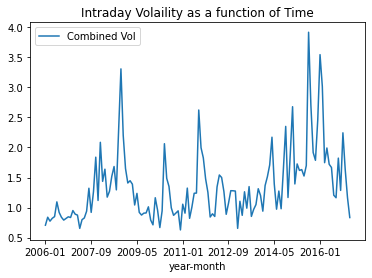

In [ ]:
final_df.plot(x = "year-month", y = "Combined Vol", title = "Intraday Volaility as a function of Time")

From the graphs above, it seems that intraday volility has spikes that last a few years or so. 

In [ ]:
#Lets see what the average daily move is over the entire dataset
final_df["Combined Vol"].mean()

1.3554215704731416

This means that the Nasdaq moves an average of 1.35 pts intraday on a monthly time frame. But what is daily movement correlated to? To start, lets see how average intraday market movement varies relative to individual macro factors that dicate current markert environments. 

INTRADAY VOLATILITY TRENDS IN QUANITATIVE ECONOMIC METRICS

Let's see if we can see any effect on intradaility volaility trends by looking at various macro economic metric that dictate market overall environment:

- Interest Rates
- Inflation Rates
- Real GDP (percent change)
- Unemployment Rate


<Axes: title={'center': 'Volatility Relative to Interest rate Over Time'}, xlabel='year-month'>

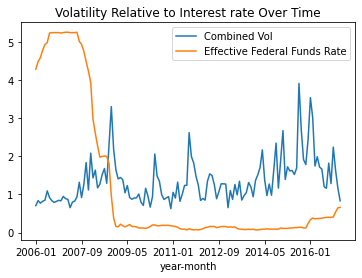

In [ ]:
final_df.plot(x = "year-month", y = ["Combined Vol", "Effective Federal Funds Rate"], title = "Volatility Relative to Interest rate Over Time")

What is noticable here is that when there is a trend in interest rate raises/decreases, intraday market volatility is higher. When interest rates stagnate, volatility is lower. 

Exploring the affect of inflation rate on market volaility

<Axes: title={'center': 'Intraday Volatility Relative to Inflation Rate Over Time'}, xlabel='year-month'>

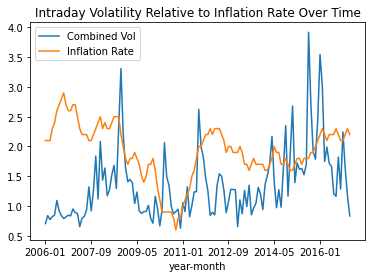

In [ ]:
final_df.plot(x = "year-month", y = ["Combined Vol", "Inflation Rate"], title = "Intraday Volatility Relative to Inflation Rate Over Time")

Exploring the affect of Real GDP Percent Change on intraday volaility

<Axes: title={'center': 'Intraday Volaility Relative to Real GDP Percent Change Over Time'}, xlabel='year-month'>

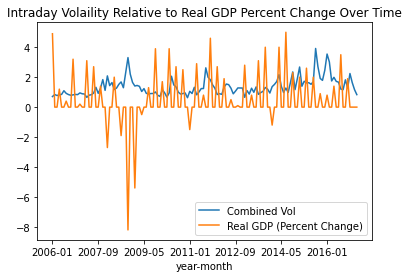

In [ ]:
final_df.plot(x = "year-month", y = ["Combined Vol", "Real GDP (Percent Change)"], title = "Intraday Volaility Relative to Real GDP Percent Change Over Time")

Here we see that large moves in Real GDP correlate with increased intraday market volaility.

<Axes: title={'center': 'Intraday Volaility Relative to Real GDP Percent Change Over Time'}, xlabel='year-month'>

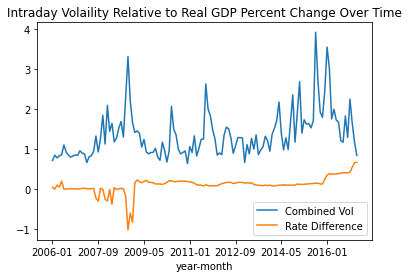

In [ ]:
final_df.plot(x = "year-month", y = ["Combined Vol", "Rate Difference"], title = "Intraday Volaility Relative to Real GDP Percent Change Over Time")

When the rate difference is negative (i.e the effective interest rate is lower than the targeted intrest rate, the market has increased volatility because of the uncertainty surrounding a potential rate hike in the future. This is reflected in the spike between the years 2007 and 2009. 

<Axes: title={'center': 'Intraday Volaility Relative to Real GDP Percent Change Over Time'}, xlabel='year-month'>

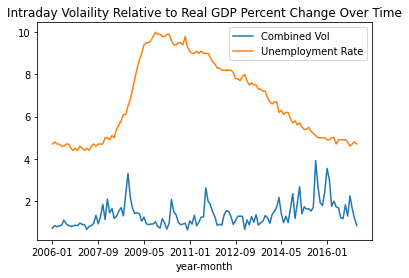

In [ ]:
final_df.plot(x = "year-month", y = ["Combined Vol", "Unemployment Rate"], title = "Intraday Volaility Relative to Real GDP Percent Change Over Time")

FILE 4: MACHINE LEARNING: Predicting the Nasdaq's average intraday volaility over monthly intervals using quantitative macro economic metrics

In [ ]:
#Dataframe being used for machine learning
final_df


,year-month,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Rate Difference,Daily Move,Combined Vol
0,2006-01,4.25,0.00,0.00,4.29,4.9,4.7,2.1,0.04,0.217333,0.706667
1,2006-02,4.50,0.00,0.00,4.49,0.0,4.8,2.1,-0.01,0.297895,0.839474
2,2006-03,4.50,0.00,0.00,4.59,0.0,4.7,2.1,0.09,0.237826,0.773935
3,2006-04,4.75,0.00,0.00,4.79,1.2,4.7,2.3,0.04,0.267368,0.822084
4,2006-05,4.75,0.00,0.00,4.94,0.0,4.6,2.4,0.19,0.282727,0.849550
...,...,...,...,...,...,...,...,...,...,...,...
129,2016-10,0.00,0.50,0.25,0.40,1.9,4.8,2.1,0.40,0.377143,1.285581
130,2016-11,0.00,0.50,0.25,0.41,0.0,4.6,2.1,0.41,0.838571,2.243662
131,2016-12,0.00,0.50,0.25,0.54,0.0,4.7,2.2,0.54,0.536190,1.635476
132,2017-01,0.00,0.75,0.50,0.65,0.0,4.8,2.3,0.65,0.320000,1.166815


KNEAREST NEIGHBORS

Lets first start with a K-Nearest Neighbors Model. We need to figure out which features to include in our training model. We can pick a reasonable value for k. We will use k = 20 to evaluate the RSME of each 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression

<Axes: title={'center': 'Economic feature selection vs RMSE'}, ylabel='features'>

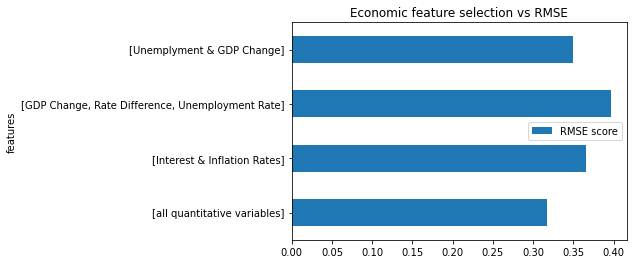

In [ ]:
#Lets look at different combinations of quantitative variables from the economic dataset containing macro metrics 
# and evaluate the RSME of each feature combination

feature_list = [["Effective Federal Funds Rate", "Real GDP (Percent Change)", "Unemployment Rate", "Inflation Rate", "Rate Difference"], 
                 ["Effective Federal Funds Rate", "Inflation Rate"], ["Real GDP (Percent Change)", "Rate Difference", "Unemployment Rate"], ["Unemployment Rate", "Real GDP (Percent Change)"]]
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=20)
)
score_error = [] 

for features in feature_list:
  X_train = final_df[features]
  y_train = final_df["Combined Vol"]
    
  scores = cross_val_score(
  pipeline,
  X_train,
  y_train, 
  scoring = "neg_mean_squared_error",
  cv=15
    
  ).mean()


  score_error.append(-scores)

titles = [["all quantitative variables"], ["Interest & Inflation Rates"], ["GDP Change, Rate Difference, Unemployment Rate"], ["Unemplyment & GDP Change"]]


df_feature_selection = pd.DataFrame()
df_feature_selection["features"] = titles
df_feature_selection["RMSE score"]  = score_error


    

df_feature_selection.plot.barh(x = "features", y = "RMSE score", title = "Economic feature selection vs RMSE")




In [ ]:
df_feature_selection

,features,RMSE score
0,[all quantitative variables],0.317330
1,[Interest & Inflation Rates],0.365305
2,"[GDP Change, Rate Difference, Unemployment Rate]",0.396087
3,[Unemplyment & GDP Change],0.349455


The difference is minimal, but the K-Neartest Neighbors model with all quantitative variables has the lowest negative RSME of .31

Now, since we know the features that we are going to use, let's move onto metric selection. 

[0.3173298353209522, 0.32497239375253967, 0.3132493780729787, 0.3173298353209522, 0.32497239375253967, 0.29725555507902707]
['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cityblock', 'cosine']


<Axes: title={'center': 'Distance metrics vs RMSE'}, ylabel='distance metric'>

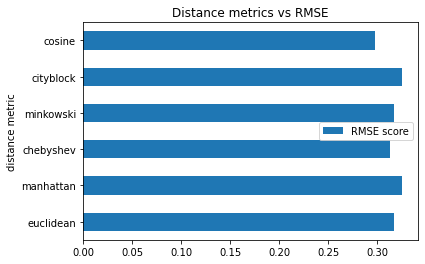

In [ ]:
error = []
metric_list = ["euclidean", "manhattan", "chebyshev", "minkowski", "cityblock", "cosine"]
for metrics in metric_list:

    pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=20, metric = metrics, n_jobs=1)


  )

    for features in [["Effective Federal Funds Rate", "Real GDP (Percent Change)", "Unemployment Rate", "Inflation Rate", "Rate Difference"]]:
      X_train = final_df[features]
      y_train = final_df["Combined Vol"]
    
      scores = cross_val_score(
      pipeline,
      X_train,
      y_train, 
      scoring = "neg_mean_squared_error",
      cv=15
    
      ).mean()

      error.append(-scores)

      
print(error)
print(metric_list)


df_metric_selection = pd.DataFrame()
df_metric_selection["distance metric"] = metric_list
df_metric_selection["RMSE score"]  = error



df_metric_selection.plot.barh(x = "distance metric", y = "RMSE score", title = "Distance metrics vs RMSE")





In [ ]:
df_metric_selection

,distance metric,RMSE score
0,euclidean,0.317330
1,manhattan,0.324972
2,chebyshev,0.313249
3,minkowski,0.317330
4,cityblock,0.324972
5,cosine,0.297256


As we can see above, the cosine distance metric has the loswest RMSE. We will use this as our distance metric moving forward.

Now that we have our optimal economic features selected and a distance metric, let's find the optimal value for k in our k-nearest neighbors algorthim.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.4008159132471883, 0.41500755734803535, 0.3333452944301479, 0.3248462758183425, 0.359024797363435, 0.348371755592753, 0.35973820864219647, 0.34089507375577793, 0.3365275787575402, 0.3330846342438921, 0.3266794527967822, 0.3280292987532091, 0.32441093238657254, 0.32296756633383045, 0.31600563954407573, 0.3120004358117875, 0.30647887778540744, 0.30089969514939946, 0.2993283108747336, 0.29725555507902707, 0.2981809666929437, 0.29750915766551617, 0.29648946750458144, 0.30019152000940397, 0.3060008432841171, 0.3100061349440572, 0.31638966407331837, 0.3170243827378505, 0.31476370771592715, 0.3194277611189795,

<Axes: title={'center': 'K-Nearest Neighbors'}, xlabel='k-value'>

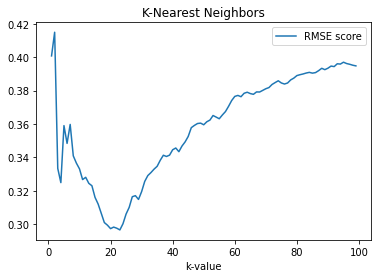

In [ ]:
error = []
k_value = []

for k in range(1, 100):

    pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=k, metric = "cosine", n_jobs=1)


  )
    #selected features
    for features in [["Effective Federal Funds Rate", "Real GDP (Percent Change)", "Unemployment Rate", "Inflation Rate", "Rate Difference"]]:
      X_train = final_df[features]
      y_train = final_df["Combined Vol"]
    
      scores = cross_val_score(
      pipeline,
      X_train,
      y_train, 
      scoring = "neg_mean_squared_error",
      cv=15
    
      ).mean()

      k_value.append(k)
      error.append(-scores)


print(k_value)
print(error)




df_k_selection = pd.DataFrame()
df_k_selection["k-value"] = k_value
df_k_selection["RMSE score"]  = error

df_k_selection.plot(x = "k-value", y = "RMSE score", title ="K-Nearest Neighbors")



In [ ]:
min_index = df_k_selection[df_k_selection["RMSE score"] == df_k_selection["RMSE score"].min()].index.values
df_k_selection.sort_values(by = "RMSE score", ascending = True)

,k-value,RMSE score
22,23,0.296489
19,20,0.297256
21,22,0.297509
20,21,0.298181
18,19,0.299328
...,...,...
92,93,0.396101
95,96,0.396249
94,95,0.397048
0,1,0.400816


Based on the table of values above, the optimal value of k is 23. Putting the previous steps of feature and metric selection and also k-value optimization, our final model incorperates 

features: Interest rate, GDP change, unemployment rate, inflation rate, & rate difference. 

metric: cosine

optimal k-value: 22

RMSE score: .295739

Gradient Boosting Regressor

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.35716328616543774, 0.35787366549717314, 0.3589980167542632, 0.36166191541725373, 0.3588430957271747, 0.35807095166141445, 0.3548369709964622, 0.35599763138365836, 0.3580364732661973, 0.3561496994816116, 0.3566213829611672, 0.35519744386159374, 0.35802068083247557, 0.35948188192613134, 0.354745607675058, 0.3559054944346613, 0.3540048946076071, 0.35637414040107745, 0.35899785843321425, 0.3580442134076762, 0.3568214952903924, 0.3597328275229187, 0.35863563807395143, 0.3568315110045893, 0.3571240585865502, 0.36090424429375595, 0.3565754317781166, 0.357174116991233, 0.3577437828101706, 0.352328307062532, 0.

<Axes: title={'center': 'Gradient Boosting Regression'}, xlabel='random state'>

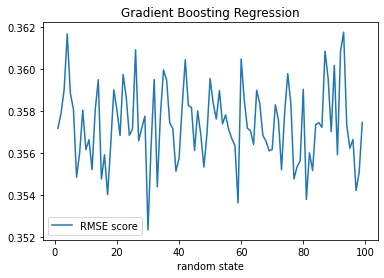

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
error = []
k_value = []

for k in range(1, 100):

    pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(random_state=k)


  )
    #selected features
    for features in [["Effective Federal Funds Rate", "Real GDP (Percent Change)", "Unemployment Rate", "Inflation Rate", "Rate Difference"]]:
      X_train = final_df[features]
      y_train = final_df["Combined Vol"]
    
      scores = cross_val_score(
      pipeline,
      X_train,
      y_train, 
      scoring = "neg_mean_squared_error",
      cv=15
    
      ).mean()

      k_value.append(k)
      error.append(-scores)


print(k_value)
print(error)




df_boosting = pd.DataFrame()
df_boosting["random state"] = k_value
df_boosting["RMSE score"]  = error

df_boosting.plot(x = "random state", y = "RMSE score", title ="Gradient Boosting Regression")



Gradient Boosting doesn't look too promising with a RMSE of .359...let's try another model

In [ ]:
df_boosting.sort_values(by = "RMSE score", ascending = True)

,random state,RMSE score
29,30,0.352328
58,59,0.353613
80,81,0.353780
16,17,0.354005
96,97,0.354198
...,...,...
86,87,0.360838
91,92,0.360844
25,26,0.360904
3,4,0.361662


RANDOM FOREST REGRESSION

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.5592881389537393, 0.495587051936203, 0.4271170481954773, 0.36288458116826067, 0.35326683449877233, 0.37700642214455987, 0.34414400402527384, 0.3413633422842486, 0.38509911894647, 0.3417814425367625, 0.34639180735037983, 0.34912772687860777, 0.32434791479481284, 0.35595200609917943, 0.3099410214225767, 0.3537638596052942, 0.3680183415622435, 0.31691232777657974, 0.34974282293612996, 0.3801492771971104, 0.3546974349772126, 0.33058728364112705, 0.3482664026490589, 0.3649324621823704, 0.3503155164138275, 0.35184337576208496, 0.3504818721636039, 0.3503513544559299, 0.3402419176373688, 0.33270769128200095, 0

<Axes: title={'center': 'Random Forest Regression'}, xlabel='n-estimator value'>

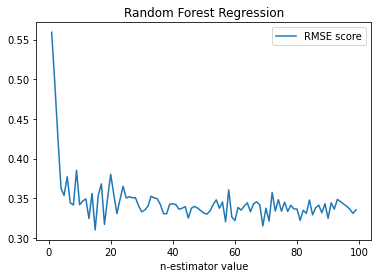

In [ ]:
from sklearn.ensemble import RandomForestRegressor
error = []
k_value = []

for k in range(1, 100):

    pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=k)


  )
    #selected features
    for features in [["Effective Federal Funds Rate", "Real GDP (Percent Change)", "Unemployment Rate", "Inflation Rate", "Rate Difference"]]:
      X_train = final_df[features]
      y_train = final_df["Combined Vol"]
    
      scores = cross_val_score(
      pipeline,
      X_train,
      y_train, 
      scoring = "neg_mean_squared_error",
      cv=15
    
      ).mean()

      k_value.append(k)
      error.append(-scores)


print(k_value)
print(error)




df_random_forest_n = pd.DataFrame()
df_random_forest_n["n-estimator value"] = k_value
df_random_forest_n["RMSE score"]  = error

df_random_forest_n.plot(x = "n-estimator value", y = "RMSE score", title ="Random Forest Regression")



In [ ]:
df_random_forest_n.sort_values(by = "RMSE score", ascending = True)

,n-estimator value,RMSE score
14,15,0.309941
68,69,0.315024
17,18,0.316912
56,57,0.320194
70,71,0.321137
...,...,...
19,20,0.380149
8,9,0.385099
2,3,0.427117
1,2,0.495587


This is much better than Gradient Boosting Regression with a RMSE of .30...almost an improvement of .06!

From the table above, we can see that the best k-value for n-estimators is 6.  

RESULTS:

KNEAREST NEIGHBORS:

RMSE : .295

optimal k-value = 22
  



GRADIENT BOOSTING REGRESSOR:

RMSE: .359

optimal random state value: 30

RANDOM FOREST REGRESSOR:

RMSE: .30

optimal n-estimator value: 7



All in all, since the RMSE is pretty large relative to the volaility scores of our model, using macro economic trends to predict traday volaility averages over monthly timeframes probably isn't the best appraoch, but we can see that using all of the quantitaive variables in the dataset yielded the best results. 